In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [31]:
class LinearRegression():

    def __init__(self, eta, epochs, log=False):
        self.eta = eta
        self.epochs = epochs
        self.log = log

    def predict(self, X):
        X_1 = np.append(X, np.ones(shape=(X.shape[0], 1)), axis=1)
        return self.get_activation(X_1)
    
    def get_activation(self, X):
        return np.dot(X, self.w)
    
    def fit(self, X, y):
        X_1 = np.append(X, np.ones(shape=(X.shape[0], 1)), axis=1)
        self.w = np.random.rand(X_1.shape[1])
        list_of_errors = []
        
        for epoch in range(self.epochs):
            activation = self.get_activation(X_1)
            error = 0.5 * (np.square((y - activation)).sum())
            delta_w = self.eta * np.dot((y - activation), X_1)
            self.w += delta_w
            list_of_errors.append(error)
            if self.log == True:
                print(f"Epoch: {epoch+1}, error: {error}")

        plt.plot(range(self.epochs), list_of_errors)      
        

In [8]:
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
        'RAD','TAX','PTRATIO','B','LSTAT','MEDV']
data = pd.read_csv(r'../zasoby/housing.data', sep=' +', engine='python', header=None, names=cols)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
X = data.LSTAT.to_numpy().reshape(-1, 1)
y = data.MEDV

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

Epoch: 1, error: 114743.36319275241
Epoch: 2, error: 46733.34036079043
Epoch: 3, error: 21982.298074688646
Epoch: 4, error: 12960.93242764413
Epoch: 5, error: 9667.961376124333
Epoch: 6, error: 8464.262439735285
Epoch: 7, error: 8023.66821354967
Epoch: 8, error: 7862.185270328007
Epoch: 9, error: 7802.92590859831
Epoch: 10, error: 7781.1535724522255
Epoch: 11, error: 7773.145166512389
Epoch: 12, error: 7770.196297562819
Epoch: 13, error: 7769.109349375832
Epoch: 14, error: 7768.708314420772
Epoch: 15, error: 7768.560215397468
Epoch: 16, error: 7768.505476514669
Epoch: 17, error: 7768.485228085942
Epoch: 18, error: 7768.477732302075
Epoch: 19, error: 7768.474955450917
Epoch: 20, error: 7768.473926064784
Epoch: 21, error: 7768.473544230059
Epoch: 22, error: 7768.4734025117195
Epoch: 23, error: 7768.47334988416
Epoch: 24, error: 7768.473330330822
Epoch: 25, error: 7768.473323062504
Epoch: 26, error: 7768.473320359556
Epoch: 27, error: 7768.4733193539705
Epoch: 28, error: 7768.473318979717

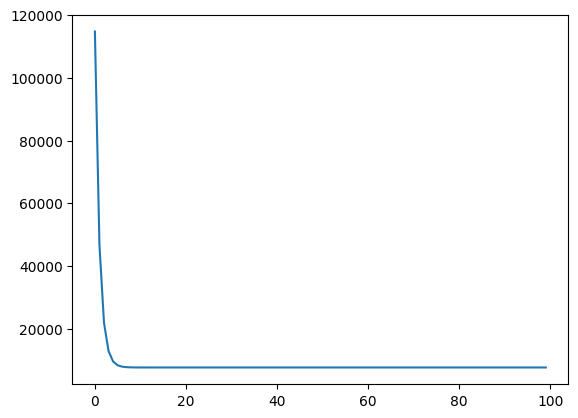

In [36]:
regression = LinearRegression(0.001, 100, True)
regression.fit(X_train, y_train)

In [37]:
y_pred = regression.predict(X_train)

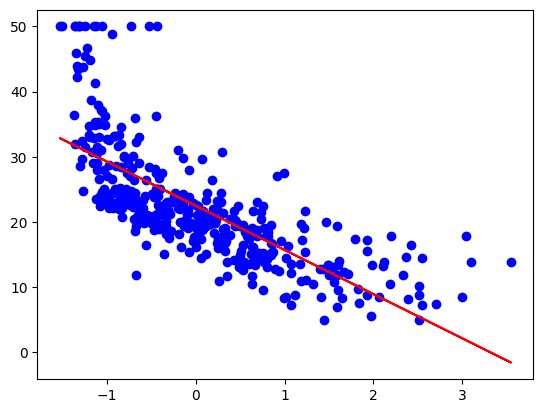

In [38]:
plt.scatter(x=X_train, y=y_train, c='blue')
plt.plot(X_train, y_pred, c='red')

In [39]:
y_pred_test = regression.predict(X_test)

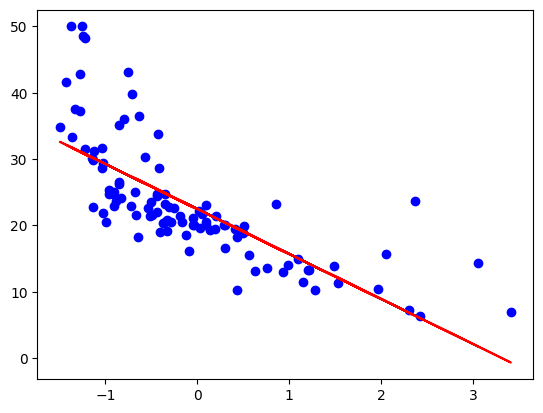

In [40]:
plt.scatter(x=X_test, y=y_test, c='blue')
plt.plot(X_test, y_pred_test, c='red')

(-2.0, 52.0)

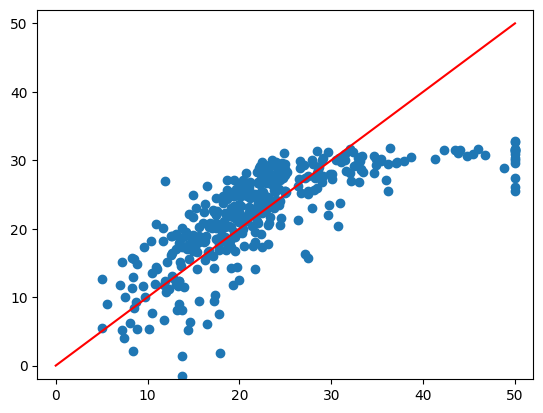

In [48]:
plt.scatter(x=y_train, y=y_pred)
plt.plot(range(51), range(51), c='red')
plt.xlim(-2,52)
plt.ylim(-2,52)

(-1.0, 51.0)

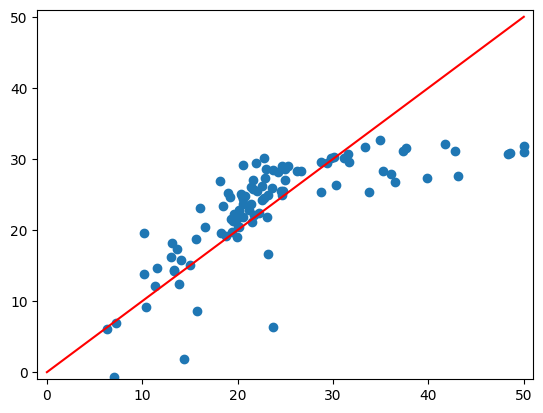

In [47]:
plt.scatter(x=y_test, y=y_pred_test)
plt.plot(range(51), range(51), c='red')
plt.xlim(-1,51)
plt.ylim(-1,51)